Excercise 1 - Generated Quantities Block

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
F=7
L=10

In [4]:
gen_quant = CmdStanModel( stan_file = "C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\code_1.stan" )

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
samples = gen_quant.sample(data={'M':F},
                            fixed_param=True,
                            iter_sampling=1000,
                            iter_warmup=0,
                            chains=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,96.8543,92.0,89.0,105.0,93.0,113.0,96.0,84.0
1,0.0,0.0,143.3520,153.0,149.0,155.0,145.0,122.0,154.0,144.0
2,0.0,0.0,18.0999,15.0,11.0,8.0,21.0,13.0,16.0,17.0
3,0.0,0.0,66.5479,69.0,63.0,59.0,69.0,67.0,69.0,75.0
4,0.0,0.0,98.1941,108.0,113.0,114.0,116.0,96.0,95.0,113.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,13.5293,18.0,16.0,13.0,17.0,12.0,10.0,19.0
996,0.0,0.0,279.5340,284.0,295.0,277.0,280.0,277.0,287.0,334.0
997,0.0,0.0,186.7420,188.0,177.0,193.0,205.0,193.0,190.0,187.0
998,0.0,0.0,107.6410,118.0,102.0,89.0,109.0,109.0,98.0,111.0


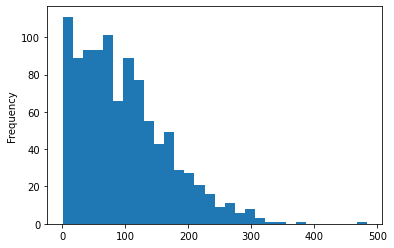

In [7]:
lam = df['lambda']

lam.plot.hist(bins=30)

plt.show()

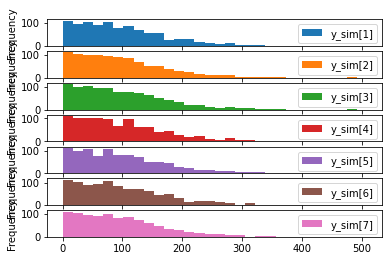

In [8]:
df2 = df.drop(df.columns[0:3],axis=1)
df2.plot.hist(subplots=True, bins=30)

plt.show()

Excercise 2 - Constraints on the data

In [9]:
bern1 = CmdStanModel(stan_file='C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_2.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_2.hpp C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_2.stan
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_2.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [10]:
bern2 = CmdStanModel(stan_file='C:\\Users\\Jaskier-PC\\Desktop\\semestr8\\Data_analysis\\Lab2\\code_3.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_3.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_3.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_3.hpp C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_3.stan
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_3.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-

In [11]:
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [13]:
theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')

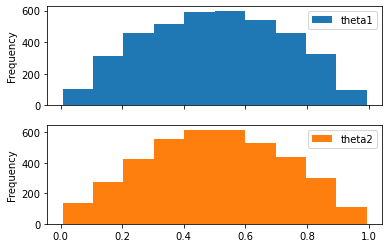

In [17]:
df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True)
plt.show()

Excercise 3 - constraints on the parameters

In [18]:
model_gm1 = CmdStanModel(stan_file='C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000,seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_4.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_4.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_4.exe
INFO:cmdstanpy:created output directory: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\samples
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_4-20220523215629_1.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_4-20220523215629_2.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_4-20220523215629_3.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_4-20220523215629_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffec

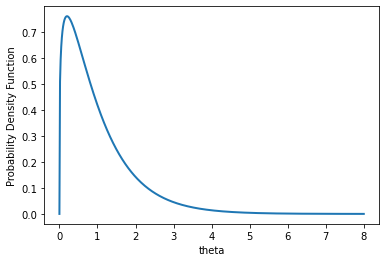

In [24]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)
plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [22]:
model_gm2 = CmdStanModel(stan_file='C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000,seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_5.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_5.exe
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_5-20220523215929_1.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_5-20220523215929_2.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_5-20220523215929_3.csv, C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\samples\\code_5-20220523215929_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective

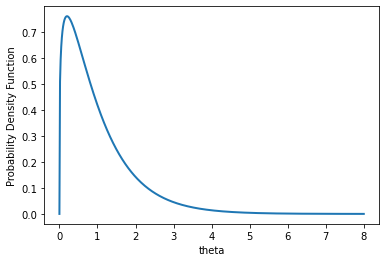

In [23]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)
plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


Excercise 4 - Selection of parameters using equation solving

In [27]:
model_tune = CmdStanModel(stan_file='C:\\Users\\Wiola\\Documents\\AGH\\AGH_Data_Analytics\\LAB_1\\Exercise_1\\Lab2\\code_6.stan')

y0 = 1
data={'y_guess':[y0],
'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1,iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_6.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_6.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_6.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_6.hpp C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_6.stan
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_6.stan', line 3, column 45: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_6.stan

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,3.29991


Excercise 5 - different methods of defining models

In [28]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 9121994

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_7.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_7.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_7.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_7.hpp C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_7.stan
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_7.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


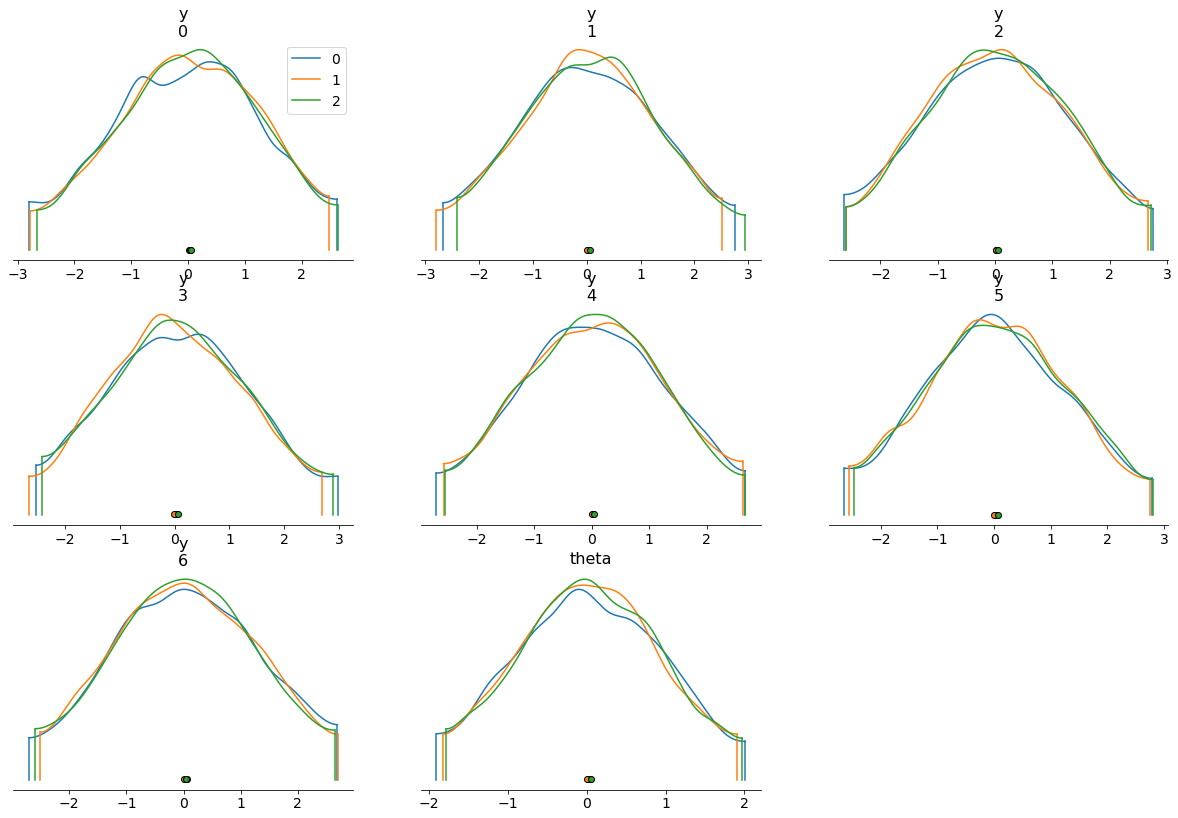

In [29]:
result1 = model_samp_st.sample(data=data,seed=seed)
result2 = model_log_target.sample(data=data,seed=seed)
result3 = model_log_target_ind.sample(data=data,seed=seed)
az.plot_density([result1,result2,result3])
plt.show()

Excercise 6 - generated quantities post sampling

In [30]:
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_of_y = model_gq.generate_quantities(data=data,
 mcmc_sample = result3)
df = mean_of_y.generated_quantities_pd
df.plot.hist(bins=50)

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_10.stan to exe file C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_10.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\Documents\AGH\AGH_Data_Analytics\LAB_1\Exercise_1\Lab2\code_10.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_10.hpp C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_10.stan
Warning in 'C:/Users/Wiola/Documents/AGH/AGH_Data_Analytics/LAB_1/Exercise_1/Lab2/code_10.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall

AttributeError: 'CmdStanGQ' object has no attribute 'generated_quantities_pd'